In [1]:
from glob import glob
import numpy as np
import scFates as scf

folders=glob("revision_stat_processed/*/")

exps=[f.split("_")[4] for f in folders]

exps.sort()

In [2]:
folders

['revision_stat_processed/161221_Echinoporalamellosa_EGTA1_after/',
 'revision_stat_processed/161221_Echinoporalamellosa_EGTA3_before/',
 'revision_stat_processed/161221_Echinoporalamellosa_EGTA2_before/',
 'revision_stat_processed/161221_echinoporalamellosa_5htp3_after/',
 'revision_stat_processed/161221_echinoporalamellosa_5htp2_after/',
 'revision_stat_processed/161221_Echinoporalamellosa_Orthovanadate1_after/',
 'revision_stat_processed/161221_echinoporalamellosa_5htp1_before/',
 'revision_stat_processed/161221_Echinoporalamellosa_Orthovanadate1_before/',
 'revision_stat_processed/161221_Echinoporalamellosa_Orthovanadate3_before/',
 'revision_stat_processed/161221_Echinoporalamellosa_Fluoxetine2_before/',
 'revision_stat_processed/161221_Echinoporalamellosa_Orthovanadate2_before/',
 'revision_stat_processed/161221_Echinoporalamellosa_Orthovanadate3_after/',
 'revision_stat_processed/161221_Echinoporalamellosa_Orthovanadate2_after/',
 'revision_stat_processed/161221_Echinoporalamell

In [3]:
exps

['5htp1',
 '5htp1',
 '5htp2',
 '5htp2',
 '5htp3',
 '5htp3',
 'EGTA1',
 'EGTA1',
 'EGTA2',
 'EGTA2',
 'EGTA3',
 'EGTA3',
 'Fluoxetine1',
 'Fluoxetine1',
 'Fluoxetine2',
 'Fluoxetine2',
 'Fluoxetine3',
 'Fluoxetine3',
 'Orthovanadate1',
 'Orthovanadate1',
 'Orthovanadate2',
 'Orthovanadate2',
 'Orthovanadate3',
 'Orthovanadate3']

In [4]:
import matplotlib.pyplot as plt
scf.set_figure_pubready()

In [5]:
def track_stats(DT,stat="mean"):
    tdata = DT.track_data

    allparents = np.unique(tdata["Parent"])
    allparents = allparents[~np.isnan(allparents)]
    ldata = [group.iloc[:,[0,1,3]] for _,group in tdata.groupby("Parent")]

    def get_meanspeed(df):
        diff = df.diff()
        coords = [c for c in df.columns if not 'Time' in c]
        speeds=np.linalg.norm(diff[coords], axis=1)/diff['Time']
        return speeds.mean()*7.5
    
    def get_maxspeed(df):
        diff = df.diff()
        coords = [c for c in df.columns if not 'Time' in c]
        speeds=np.linalg.norm(diff[coords], axis=1)/diff['Time']
        return speeds.max()*7.5
    
    if stat=="mean":
        mspeeds=[get_meanspeed(df) for df in ldata]
        
    if stat=="max":
        mspeeds=[get_maxspeed(df) for df in ldata]
    return mspeeds

In [6]:
import dyntrack as dt
import pandas as pd

exps=np.unique(exps)

In [7]:
exp=exps[0]
def gather_stats(exp):
    dt.settings.verbosity=0
    # print(exp)
    # print("    before")
    timepoint="before"
    df=glob(f"revision_stat_processed/*{exp}*{timepoint}*/*csv")[0]
    img=glob(f"revision_stat_processed/*{exp}*{timepoint}*/*tiff")[0]
    DT_b=dt.ut.load_data(df=df,img=img,x_col="Position X",y_col="Position Y",
                       parent_col="TrackID",time_col="Time",pixel_scaling=1/33)
    
    DT_b.img=np.transpose(DT_b.img, (1, 0, 2))
    cols=DT_b.track_data.columns
    DT_b.track_data=DT_b.track_data.iloc[:,[1,0,2,3]]
    DT_b.track_data.columns=cols
    
    dt.pl.tracks(DT_b,show=False,rasterized=True)
    plt.savefig(f"figures/tracks_{exp}_{timepoint}.pdf",bbox_inches="tight")
    
    dt.tl.vector_field(DT_b)
    
    dt.pl.vector_field(DT_b,show=False)
    plt.savefig(f"figures/vector_{exp}_{timepoint}.pdf",bbox_inches="tight")
    
    dt.tl.FTLE(DT_b,20000,5)
    dt.pl.FTLE(DT_b,show=False)
    plt.savefig(f"figures/FTLE_{exp}_{timepoint}.pdf",bbox_inches="tight")
    
    timepoint="after"
    print("    after")
    df=glob(f"revision_stat_processed/*{exp}*{timepoint}*/*csv")[0]
    img=glob(f"revision_stat_processed/*{exp}*{timepoint}*/*tiff")[0]
    DT_a=dt.ut.load_data(df=df,img=img,x_col="Position X",y_col="Position Y",
                       parent_col="TrackID",time_col="Time",pixel_scaling=1/33)
    
    DT_a.img=np.transpose(DT_a.img, (1, 0, 2))
    cols=DT_a.track_data.columns
    DT_a.track_data=DT_a.track_data.iloc[:,[1,0,2,3]]
    DT_a.track_data.columns=cols
    
    dt.pl.tracks(DT_a,show=False,rasterized=True)
    plt.savefig(f"figures/tracks_{exp}_{timepoint}.pdf",bbox_inches="tight")
    
    dt.tl.vector_field(DT_a)
    
    dt.pl.vector_field(DT_a,show=False)
    plt.savefig(f"figures/vector_{exp}_{timepoint}.pdf",bbox_inches="tight")
    
    dt.tl.FTLE(DT_a,20000,5)
    dt.pl.FTLE(DT_a,show=False)
    plt.savefig(f"figures/FTLE_{exp}_{timepoint}.pdf",bbox_inches="tight")

    _,_, var_A,var_B,_,_= dt.tl.coordination_test(DT_b,DT_a,alternative="two-sided",return_data=True)

    res_var=pd.concat([pd.DataFrame(dict(var=var_A.ravel()[~np.isnan(var_A.ravel())],group="A")),
               pd.DataFrame(dict(var=var_B.ravel()[~np.isnan(var_B.ravel())],group="B"))],axis=0)

    meanspeeds_b=track_stats(DT_b)
    meanspeeds_a=track_stats(DT_a)
    maxspeeds_b=track_stats(DT_b,stat="max")
    maxspeeds_a=track_stats(DT_a,stat="max")
    
    res_mean=pd.concat([pd.DataFrame(dict(meanspeed=meanspeeds_b,timepoint="before")),
               pd.DataFrame(dict(meanspeed=meanspeeds_a,timepoint="after"))],axis=0)
    res_max=pd.concat([pd.DataFrame(dict(meanspeed=maxspeeds_b,timepoint="before")),
               pd.DataFrame(dict(meanspeed=maxspeeds_a,timepoint="after"))],axis=0)
    
    return [res_var,res_mean,res_max]

In [8]:
from scFates.tools.utils import ProgressParallel
from joblib import delayed

res=ProgressParallel(total=len(exps),n_jobs=len(exps))(
    delayed(gather_stats)(exp) for exp in exps
)

  0%|          | 0/12 [00:00<?, ?it/s]

    integrating:  37%|███▋      | 330/900 [00:03<00:02, 269.32it/s]
    after
    integrating: 100%|██████████| 900/900 [00:04<00:00, 216.34it/s]

  8%|▊         | 1/12 [00:45<08:20, 45.53s/it]


    after
    integrating:   0%|          | 0/900 [00:00<?, ?it/s]206.32it/s]

 17%|█▋        | 2/12 [00:58<04:51, 29.12s/it]

    integrating:   0%|          | 0/900 [00:00<?, ?it/s]223.36it/s]
    after
    integrating:   6%|▋         | 57/900 [00:00<00:01, 569.06it/s]
    after
    integrating: 100%|██████████| 900/900 [00:03<00:00, 230.82it/s]
    after
    integrating:  98%|█████████▊| 882/900 [00:01<00:00, 636.88it/s]

 25%|██▌       | 3/12 [01:21<04:04, 27.19s/it]

    integrating: 100%|██████████| 900/900 [00:01<00:00, 624.79it/s]

 33%|███▎      | 4/12 [01:22<02:44, 20.61s/it]


    after
    integrating:  20%|██        | 183/900 [00:00<00:01, 598.43it/s]

 42%|████▏     | 5/12 [01:32<02:09, 18.49s/it]

    integrating:  87%|████████▋ | 780/900 [00:01<00:00, 582.68it/s]
    after
    integrating: 100%|██████████| 900/900 [00:01<00:00, 574.40it/s]

 58%|█████▊    | 7/12 [01:48<01:17, 15.53s/it]


    after
    integrating:  41%|████      | 370/900 [00:00<00:00, 609.19it/s]
    after
    integrating: 100%|██████████| 900/900 [00:01<00:00, 624.39it/s]
    after
    integrating: 100%|██████████| 900/900 [00:01<00:00, 620.50it/s]
    after
    integrating: 100%|██████████| 900/900 [00:01<00:00, 661.70it/s]

 83%|████████▎ | 10/12 [02:10<00:26, 13.10s/it]


    after
    integrating:  93%|█████████▎| 835/900 [00:01<00:00, 639.63it/s]

 92%|█████████▏| 11/12 [02:17<00:12, 12.46s/it]

    integrating: 100%|██████████| 900/900 [00:01<00:00, 633.17it/s]

100%|██████████| 12/12 [02:30<00:00, 12.55s/it]


In [9]:
names=[exp[:-1] for exp in exps]

In [10]:
names

['5htp',
 '5htp',
 '5htp',
 'EGTA',
 'EGTA',
 'EGTA',
 'Fluoxetine',
 'Fluoxetine',
 'Fluoxetine',
 'Orthovanadate',
 'Orthovanadate',
 'Orthovanadate']

In [11]:
fname="report_revision_vectors"

In [12]:
%%bash -s $fname "{" ".join(np.unique(names))}" 
rm $1.tex

cat<<EOF >$1.tex
\documentclass{article}
\usepackage[paperheight=205mm,paperwidth=220mm]{geometry}
\geometry{left=5mm,right=5mm,top=5mm,bottom=5mm,}
 
\usepackage[labelfont=bf]{caption}
\usepackage[dvipsnames]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphicx} 

\begin{document}
\setmainfont{Arial}

\noindent
\large 

\fontsize{9pt}{9pt}\selectfont

EOF



for exp in $2
do
    echo \\textbf{$exp} >> $1.tex
    echo $'\n' >> $1.tex
    for i in {1..3}
    do 
        echo \\begin{minipage}[\!ht]{0.32\\linewidth} >> $1.tex
        echo \\includegraphics[width=1\\textwidth]{figures/vector_"$exp""$i"_before.pdf} >> $1.tex
        echo \\includegraphics[width=1\\textwidth]{figures/vector_"$exp""$i"_after.pdf} >> $1.tex
        echo \\end{minipage}\\hfill >> $1.tex
    done
done

echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
convert -flatten -density 300 $1.pdf[0] $1-1.jpg
convert -flatten -density 300 $1.pdf[1] $1-2.jpg


identify $1.pdf

#rm $1.tex

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./report_revision_vectors.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/xetex.def)
(/usr/share/

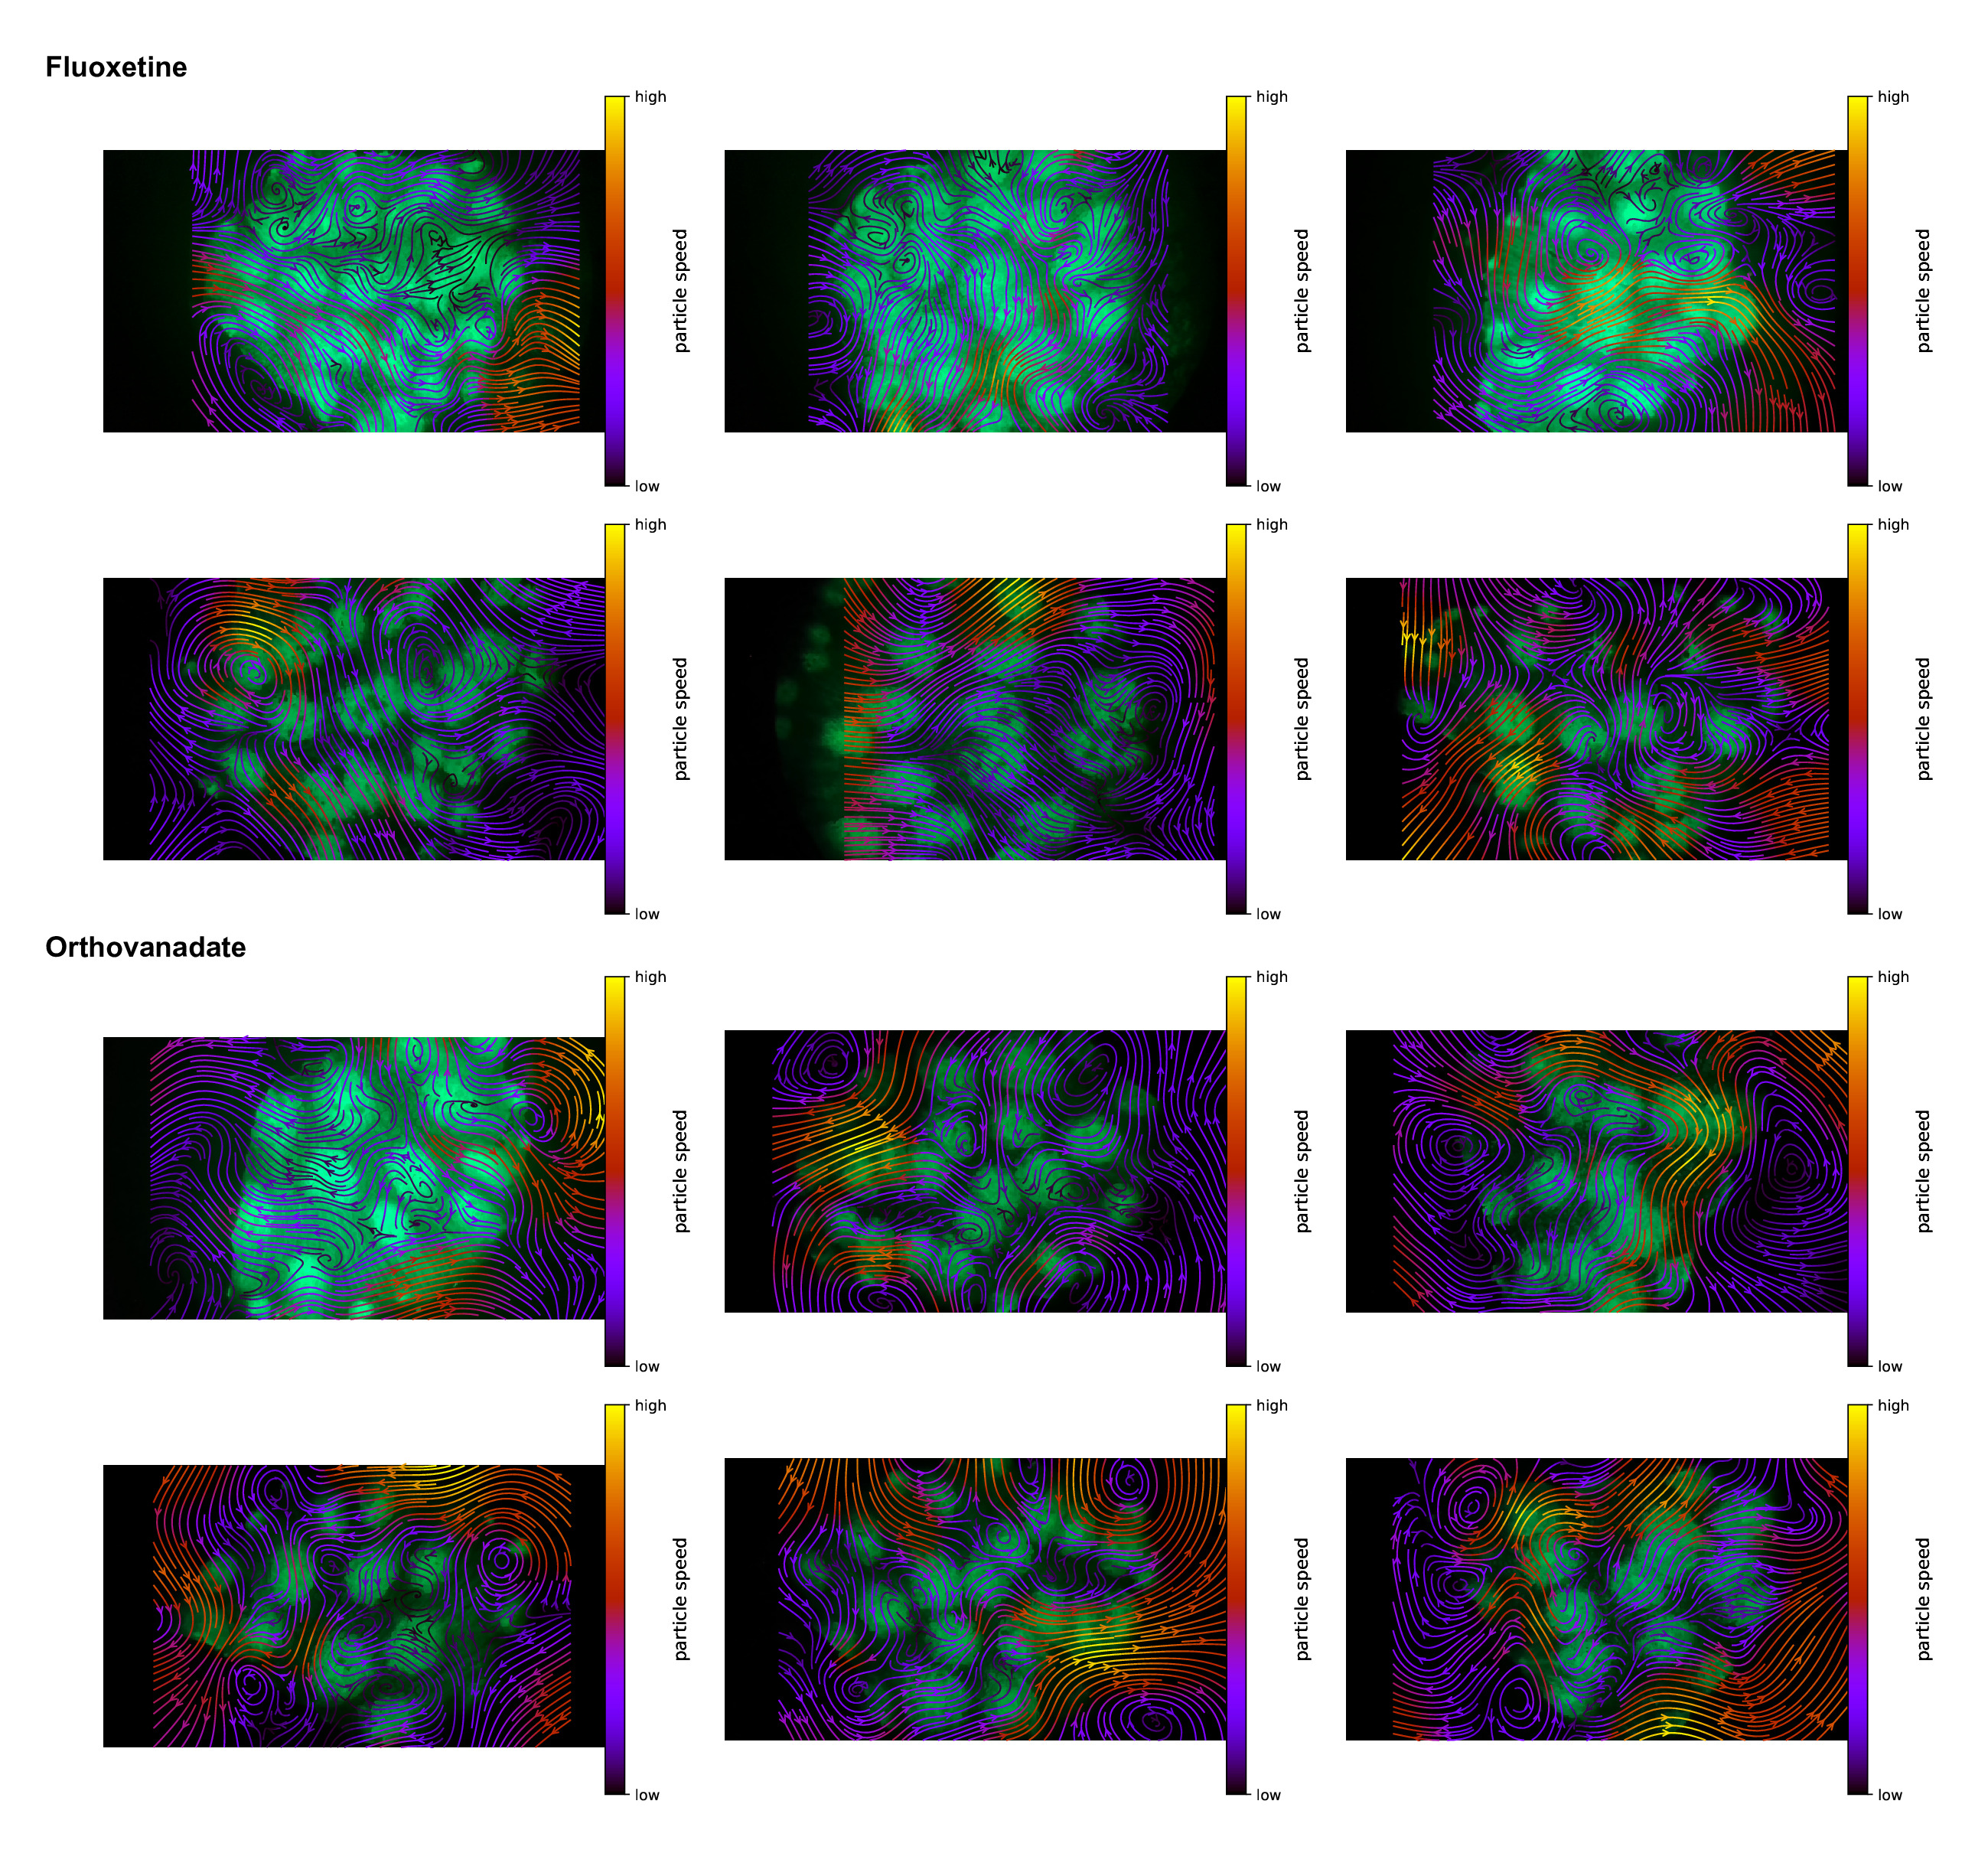

In [13]:
from IPython.display import Image
Image(filename=fname+'-2.jpg') 


In [14]:
fname="report_revision_tracks"

In [15]:
%%bash -s $fname "{" ".join(np.unique(names))}" 
rm $1.tex

cat<<EOF >$1.tex
\documentclass{article}
\usepackage[paperheight=175mm,paperwidth=220mm]{geometry}
\geometry{left=5mm,right=5mm,top=5mm,bottom=5mm,}
 
\usepackage[labelfont=bf]{caption}
\usepackage[dvipsnames]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphicx} 

\begin{document}
\setmainfont{Arial}

\noindent
\large 

\fontsize{9pt}{9pt}\selectfont

EOF



for exp in $2
do
    echo \\textbf{$exp} >> $1.tex
    echo $'\n' >> $1.tex
    for i in {1..3}
    do 
        echo \\begin{minipage}[\!ht]{0.32\\linewidth} >> $1.tex
        echo \\includegraphics[width=1\\textwidth]{figures/tracks_"$exp""$i"_before.pdf} >> $1.tex
        echo \\includegraphics[width=1\\textwidth]{figures/tracks_"$exp""$i"_after.pdf} >> $1.tex
        echo \\end{minipage}\\hfill >> $1.tex
    done
done

echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
convert -flatten -density 300 $1.pdf[0] $1-1.jpg
convert -flatten -density 300 $1.pdf[1] $1-2.jpg


identify $1.pdf

#rm $1.tex

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./report_revision_tracks.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/xetex.def)
(/usr/share/t

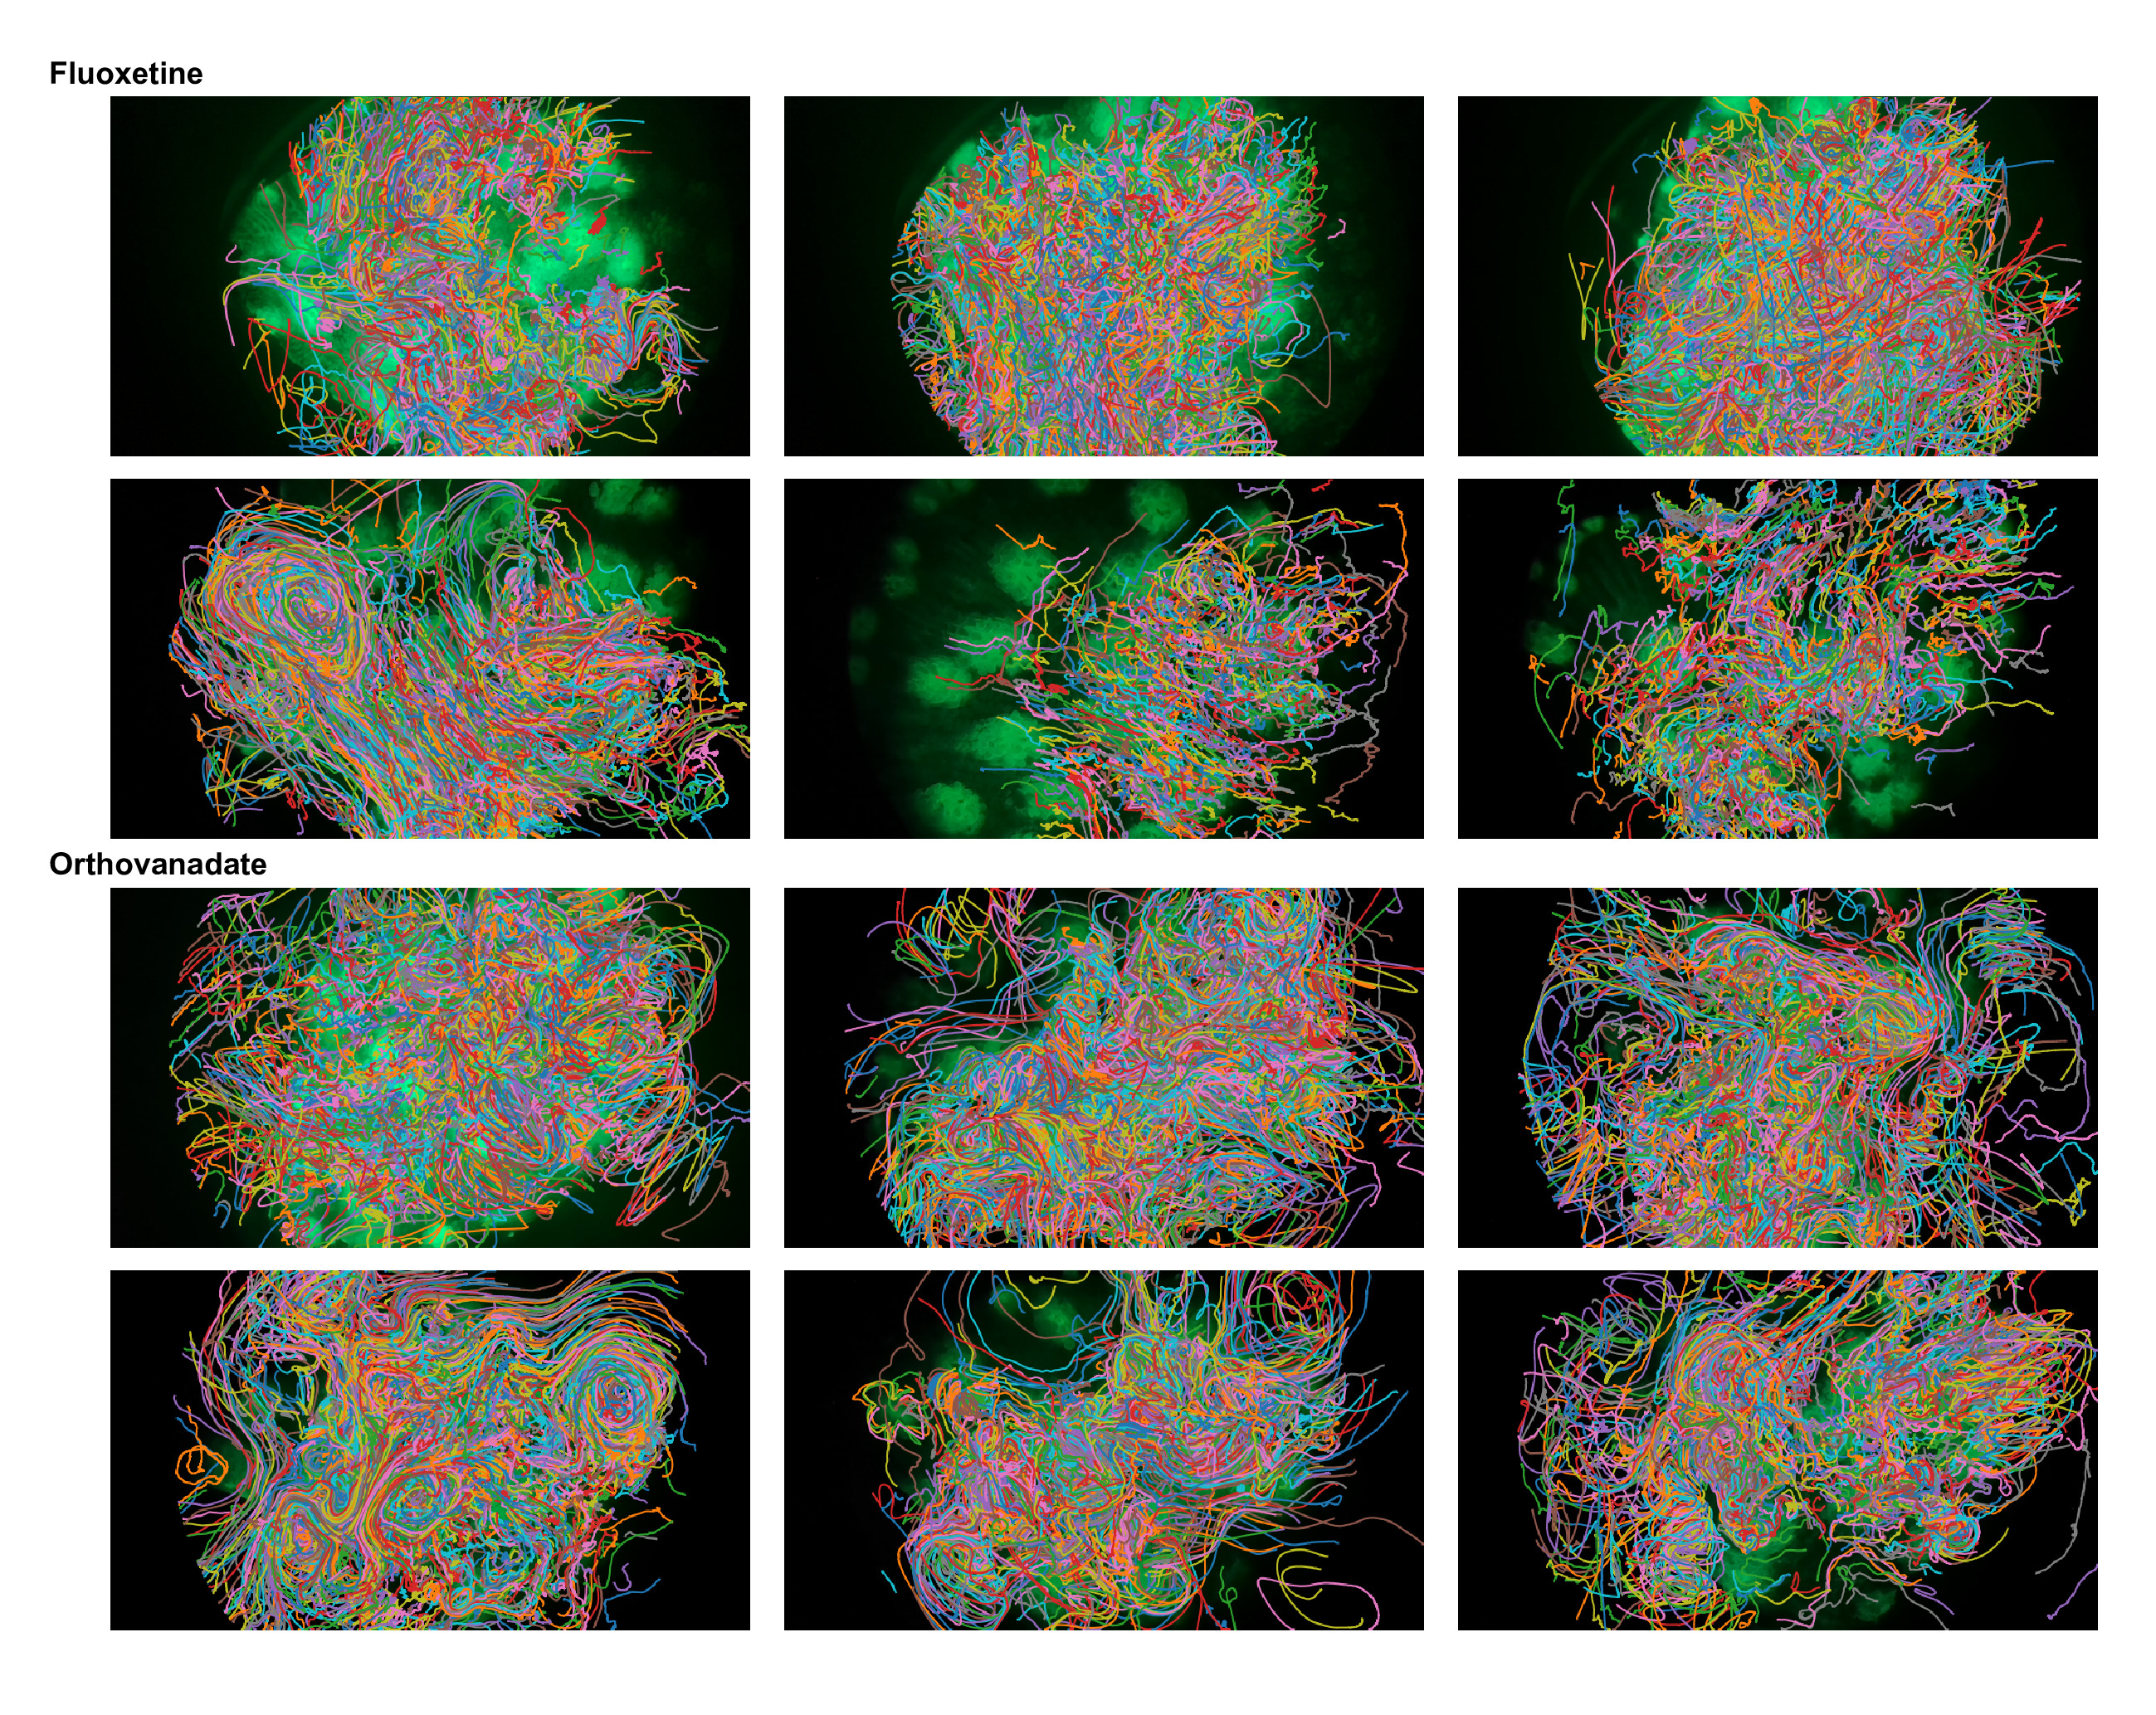

In [16]:
from IPython.display import Image
Image(filename=fname+'-2.jpg') 


In [17]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"]=150

In [18]:
import scFates as scf
scf.set_figure_pubready()

In [19]:
names=[exp[:-1] for exp in exps]

In [20]:
from scipy.stats import ranksums

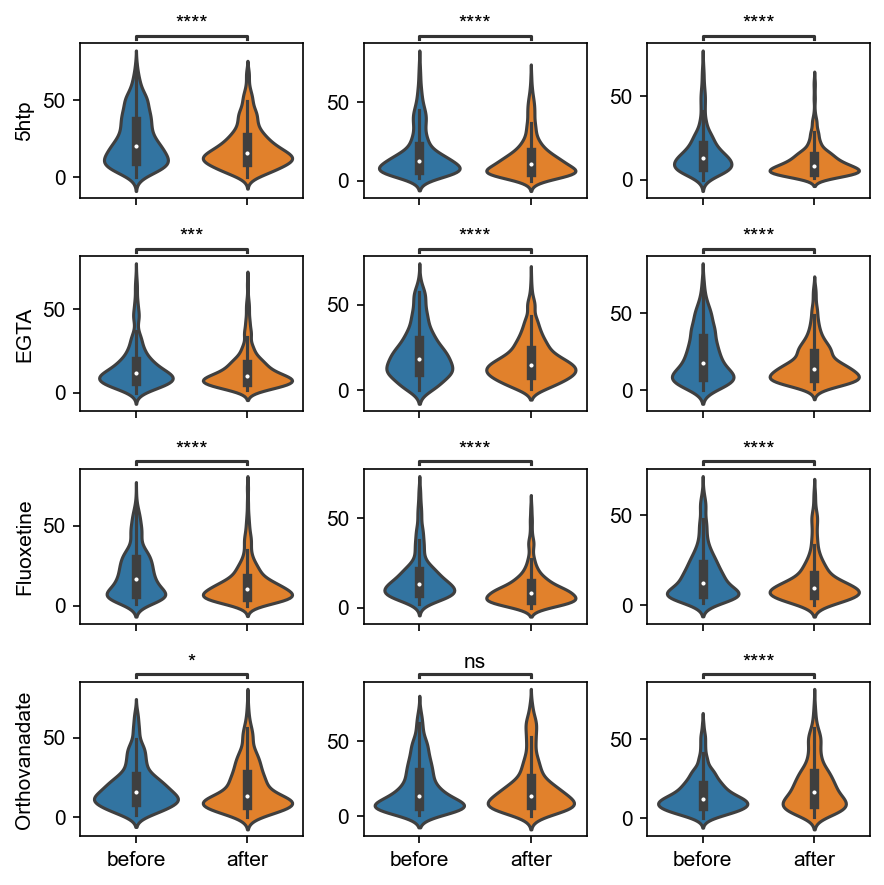

In [21]:
import seaborn as sns
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4,3,sharex=True,figsize=(6,6))
axs=axs.ravel()

order=["before","after"]
pairs=[order]
x="group"
y="var"
for i in range(12):
    res[i][0]["group"]=res[i][0]["group"].replace(["A","B"],["before","after"])
    sns.violinplot(data=res[i][0],x=x,y=y,order=order,ax=axs[i])
    annotator = Annotator(axs[i], pairs, data=res[i][0], x=x, y=y, order=order)
    annotator.configure(test=None, text_format='star', loc='outside',verbose=False)
    annotator.set_pvalues([ranksums(res[i][0][y].loc[res[i][0][x]=="before"],
                                res[i][0][y].loc[res[i][0][x]=="after"])[1]])
    annotator.annotate()
    axs[i].set_xlabel("")
    if (np.isin(i,[0,3,6,9])):
        axs[i].set_ylabel(names[i])
    else:
        axs[i].set_ylabel("")
plt.tight_layout()

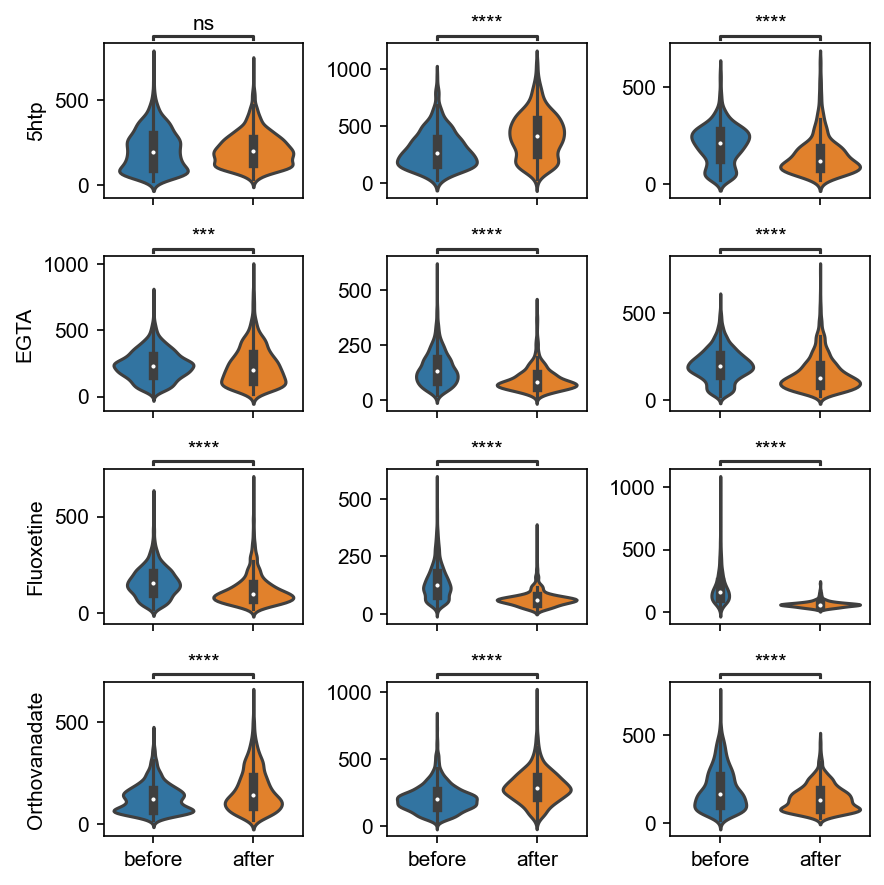

In [22]:
import seaborn as sns
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4,3,sharex=True,figsize=(6,6))
axs=axs.ravel()

order=["before","after"]
pairs=[("before", "after")]
x="timepoint"
y="meanspeed"
for i in range(12):
    sns.violinplot(data=res[i][1],x=x,y=y,order=order,ax=axs[i])
    annotator = Annotator(axs[i], pairs, data=res[i][1], x=x, y=y, order=order)
    annotator.configure(test=None, text_format='star', loc='outside',verbose=False)
    annotator.set_pvalues([ranksums(res[i][1][y].loc[res[i][1][x]=="before"],
                                res[i][1][y].loc[res[i][1][x]=="after"])[1]])
    annotator.annotate()
    axs[i].set_xlabel("")
    if (np.isin(i,[0,3,6,9])):
        axs[i].set_ylabel(names[i])
    else:
        axs[i].set_ylabel("")
plt.tight_layout()

plt.savefig("meanspeeds.pdf")

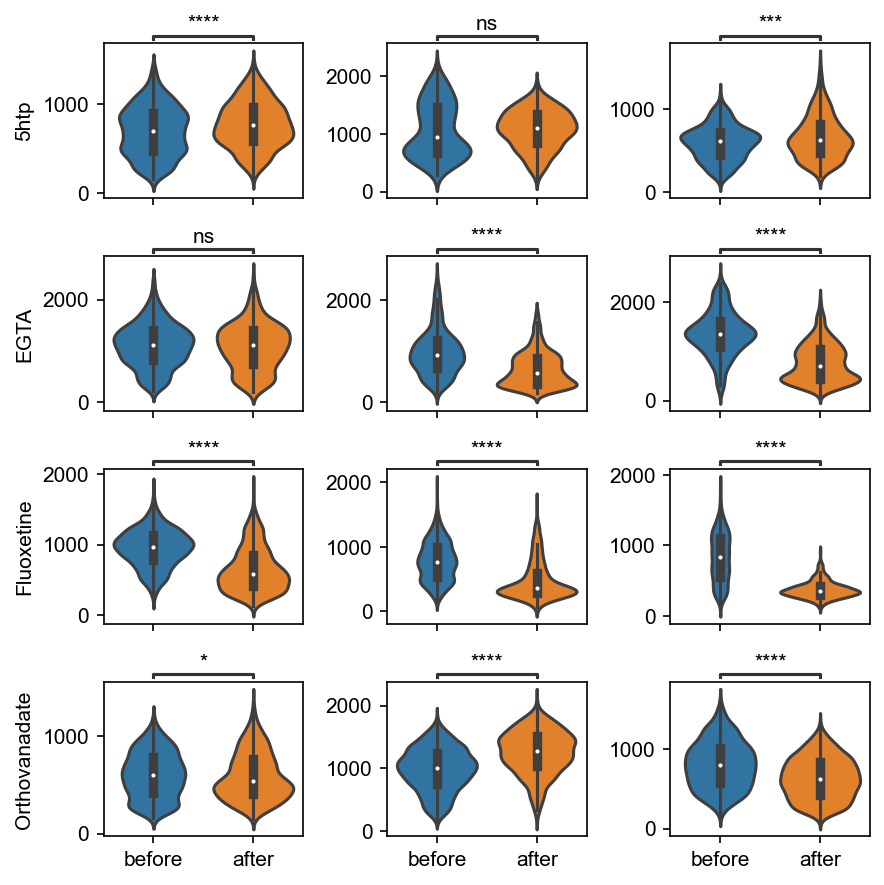

In [23]:
import seaborn as sns
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4,3,sharex=True,figsize=(6,6))
axs=axs.ravel()

order=["before","after"]
pairs=[("before", "after")]
x="timepoint"
y="meanspeed"
for i in range(12):
    sns.violinplot(data=res[i][2],x=x,y=y,order=order,ax=axs[i])
    annotator = Annotator(axs[i], pairs, data=res[i][2], x=x, y=y, order=order)
    annotator.configure(test=None, text_format='star', loc='outside',verbose=False)
    annotator.set_pvalues([ranksums(res[i][2][y].loc[res[i][2][x]=="before"],
                                res[i][2][y].loc[res[i][2][x]=="after"])[1]])
    annotator.annotate()
    axs[i].set_xlabel("")
    if (np.isin(i,[0,3,6,9])):
        axs[i].set_ylabel(names[i])
    else:
        axs[i].set_ylabel("")
plt.tight_layout()

plt.savefig("maxspeeds.pdf")